## Outliers Handling:

- We will be using kaggle's diabetes data: [kaggle link 🔗](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [1]:
import numpy as np, pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [2]:
# Loading the dataset of diabetes

df = pd.read_csv('data/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


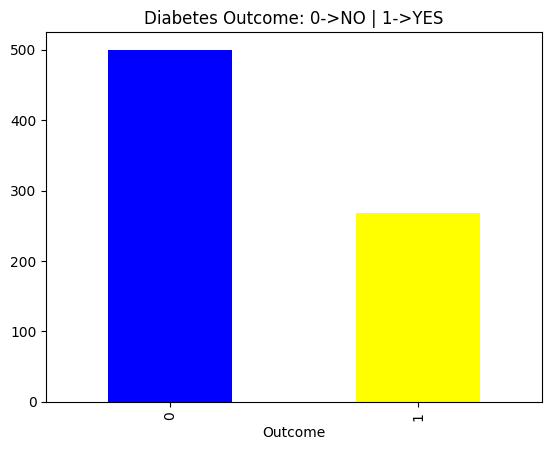

In [7]:
# This data is also imbalanced...
df['Outcome'].value_counts().plot(kind='bar', color=['blue', 'yellow'])
plt.title('Diabetes Outcome: 0->NO | 1->YES')
plt.show()

### Outlier Detection Function:

In [22]:
def detect_outliers_IQR(df: pd.DataFrame, column: str):
    
    sorted_df = df.sort_values(by = column)
    Q1 = sorted_df[column].quantile(q=0.25)
    Q3 = sorted_df[column].quantile(q=0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

def remove_outliers_IQR(df: pd.DataFrame, column: str):
    sorted_df = df.sort_values(by = column)
    Q1 = sorted_df[column].quantile(q=0.25)
    Q3 = sorted_df[column].quantile(q=0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)
    clean_df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return clean_df
    

In [ ]:
cols = list(df.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [30]:
outliers = {}
for col in cols[:-1]:
    outliers[col] = detect_outliers_IQR(df, col)
    print(f"Number of outliers [{col}]: {outliers[col].shape[0]}")

Number of outliers [Pregnancies]: 4
Number of outliers [Glucose]: 5
Number of outliers [BloodPressure]: 45
Number of outliers [SkinThickness]: 1
Number of outliers [Insulin]: 34
Number of outliers [BMI]: 0
Number of outliers [DiabetesPedigreeFunction]: 29
Number of outliers [Age]: 9
